In [42]:
from io import StringIO
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
data = pd.read_csv("winemag-data_first150k.csv")

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150930.0,75464.500000,43569.882402,0.0,37732.25,75464.5,113196.75,150929.0
points,150930.0,87.888418,3.222392,80.0,86.00,88.0,90.00,100.0
price,137235.0,33.131482,36.322536,4.0,16.00,24.0,40.00,2300.0


In [4]:
len(data)

150930

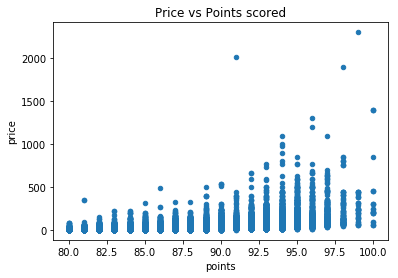

In [5]:
%matplotlib inline
data.plot(kind = "scatter", x = "points", y = "price", title = "Price vs Points scored")

In [6]:
variety_counts = data["variety"].value_counts()

In [7]:
variety_counts.head() # Most common varieties

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Name: variety, dtype: int64

In [8]:
variety_counts.tail() # Least common varieties

Moscofilero     1
Huxelrebe       1
Listán Negro    1
Durello         1
Pinela          1
Name: variety, dtype: int64

In [9]:
len(variety_counts) #Num cats in original

632

In [10]:
# Filtering out categories where under 20 of its kind
variety_counts = variety_counts[variety_counts > 20]

In [11]:
len(variety_counts) # Num of categories left

202

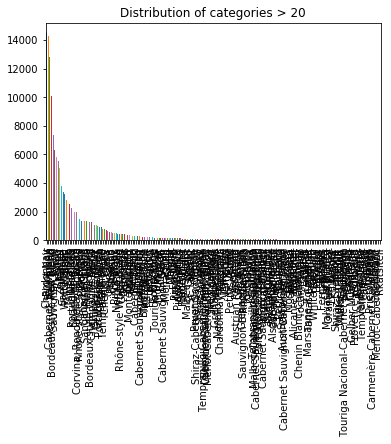

In [12]:
%matplotlib inline
variety_counts.plot(kind = "bar", title = "Distribution of categories > 20")

In [13]:
country_counts = data["country"].value_counts()

In [14]:
country_counts[:15]

US              62397
Italy           23478
France          21098
Spain            8268
Chile            5816
Argentina        5631
Portugal         5322
Australia        4957
New Zealand      3320
Austria          3057
Germany          2452
South Africa     2258
Greece            884
Israel            630
Hungary           231
Name: country, dtype: int64

In [15]:
country_counts.head()

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

In [16]:
country_counts.tail()

Albania       2
Montenegro    2
Tunisia       2
Japan         2
US-France     1
Name: country, dtype: int64

In [17]:
len(country_counts)

48

In [18]:
wineCountbyCountry = pd.DataFrame(country_counts)

In [19]:
wineCountbyCountry.describe().T

,count,mean,std,min,25%,50%,75%,max
country,48.0,3144.270833,9930.379643,1.0,5.75,47.5,1227.5,62397.0


# Extracting Features from descriptions


In [20]:
filteredData = data[data["variety"].isin(variety_counts.keys())]

In [21]:
filteredData.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,148479.0,75634.773315,43567.108036,0.0,37948.5,75652.0,113416.5,150929.0
points,148479.0,87.899003,3.226238,80.0,86.0,88.0,90.0,100.0
price,135048.0,33.272007,36.499630,4.0,16.0,24.0,40.0,2300.0


In [22]:
# An example of one wine
filteredData.iloc[1]

Unnamed: 0                                                     1
country                                                    Spain
description    Ripe aromas of fig, blackberry and cassis are ...
designation                 Carodorum Selección Especial Reserva
points                                                        96
price                                                        110
province                                          Northern Spain
region_1                                                    Toro
region_2                                                     NaN
variety                                            Tinta de Toro
winery                                   Bodega Carmen Rodríguez
Name: 1, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer(norm = 'l2', max_df = 0.80, min_df = 1000, stop_words = "english", max_features = 100)

In [25]:
Mat = vectorizer.fit_transform(filteredData["description"])

In [26]:
features = vectorizer.get_feature_names()
idx_to_features = {idx : f for idx,f in enumerate(features)}

In [27]:
print(features) # Overall features

['acidity', 'age', 'apple', 'aromas', 'balance', 'balanced', 'berry', 'big', 'bit', 'black', 'blackberry', 'blend', 'bodied', 'bright', 'cabernet', 'cassis', 'character', 'chardonnay', 'cherries', 'cherry', 'chocolate', 'citrus', 'clean', 'cola', 'complex', 'creamy', 'crisp', 'currant', 'dark', 'delicious', 'dried', 'drink', 'dry', 'easy', 'elegant', 'fine', 'finish', 'firm', 'flavor', 'flavors', 'fresh', 'fruit', 'fruits', 'fruity', 'good', 'great', 'green', 'herbal', 'juicy', 'just', 'lemon', 'light', 'like', 'little', 'long', 'medium', 'merlot', 'mineral', 'mouth', 'mouthfeel', 'nice', 'nose', 'notes', 'oak', 'offers', 'palate', 'peach', 'pear', 'pepper', 'pinot', 'plum', 'raspberry', 'red', 'rich', 'ripe', 'sauvignon', 'shows', 'slightly', 'smoky', 'smooth', 'soft', 'spice', 'spicy', 'structure', 'style', 'sweet', 'syrah', 'tannic', 'tannins', 'tart', 'texture', 'toast', 'tobacco', 'touch', 'vanilla', 'vineyard', 'white', 'wine', 'wood', 'years']


# Extracting the most pertinent descriptor words for a variety

In [28]:
top10wines = data[data["variety"].isin(variety_counts.keys()[:10])]

In [29]:
top10wines["variety"].value_counts()

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Sauvignon Blanc              6320
Syrah                        5825
Riesling                     5524
Merlot                       5070
Zinfandel                    3799
Name: variety, dtype: int64

In [30]:
def top10descriptors(data):
    vectorizer = TfidfVectorizer(norm = 'l2', max_df = 0.7, min_df = 10, stop_words = "english", max_features = 10)
    _ = vectorizer.fit(data)
    return vectorizer.get_feature_names()

In [31]:
def all_cats_top10descriptors(data, varieties):
    top10s = {}
    for var in varieties:
        top10s[var] = top10descriptors(data[data["variety"] == var]["description"])
    return top10s

In [32]:
top10wines_only = all_cats_top10descriptors(top10wines, variety_counts.keys()[:10])

In [33]:
def print_top10s(descriptors):
    print("For each of these varieties, these are the top 10 words used to talk about varieties.")
    print()
    for var, descriptors in descriptors.items():
        print("#"* 25)
        print(var)
        print("#"* 25)
        for d in descriptors:
            print(d)
        print()

In [34]:
%timeit
top100wines = data[data["variety"].isin(variety_counts.keys()[:100])]
top100wine_10descriptors = all_cats_top10descriptors(top100wines, variety_counts.keys()[:100])

In [35]:
top100wine_10descriptors["Fiano"]

['aromas',
 'citrus',
 'fiano',
 'fruit',
 'mineral',
 'palate',
 'peach',
 'pear',
 'white',
 'wine']

In [36]:
def top_n_descriptors(data, n = 200):
    vectorizer = TfidfVectorizer(norm = 'l2', min_df = 5, stop_words = "english", max_features = n)
    _ = vectorizer.fit(data)
    return vectorizer.get_feature_names()

def all_cats_top_n_descriptors(data, varieties, n = 200):
    tops = {}
    for var in varieties:
        tops[var] = top_n_descriptors(data[data["variety"] == var]["description"], n = n)
    return tops

top100wine_200descriptors = all_cats_top_n_descriptors(top100wines, variety_counts.keys()[:100])

In [37]:
print(top100wine_200descriptors["Fiano"])

['acacia', 'accented', 'acidity', 'aged', 'almond', 'alongside', 'apple', 'apricot', 'aromas', 'aromatic', 'avellino', 'backed', 'balanced', 'banana', 'beautiful', 'blossom', 'boasts', 'bodied', 'bright', 'butterscotch', 'campania', 'candied', 'carries', 'citrus', 'clean', 'close', 'closes', 'color', 'cometa', 'companion', 'complexity', 'consistency', 'continue', 'creamy', 'crisp', 'crushed', 'deep', 'delicious', 'delivers', 'density', 'depth', 'di', 'dishes', 'dried', 'drink', 'drop', 'drying', 'easy', 'elegant', 'exotic', 'expression', 'fiano', 'finish', 'fish', 'flavors', 'flint', 'flinty', 'floral', 'flower', 'follow', 'fresh', 'freshness', 'fruit', 'glass', 'golden', 'grape', 'grapefruit', 'grapes', 'hazelnut', 'herb', 'herbs', 'hint', 'honey', 'honeysuckle', 'imparts', 'include', 'intense', 'intensity', 'italy', 'juicy', 'lead', 'lemon', 'length', 'light', 'lightly', 'like', 'lime', 'linear', 'loads', 'makes', 'marks', 'match', 'mature', 'meat', 'mediterranean', 'medium', 'melon'

In [38]:
# Category Look Ups
wine_cats = variety_counts.keys()[:100]
cat_to_idx = {w:idx for idx, w in enumerate(wine_cats)}

# Jaccard Sim Matrix
def buildSimMat(descriptors):
    sim_mat = np.zeros((len(wine_cats), len(wine_cats)))
    for i in range(len(wine_cats)):
        for j in range(len(wine_cats)):
            if i == j: sim_mat[i][j] = 0
            elif j < i: continue
            else:
                setI = set(descriptors[wine_cats[i]])
                setJ = set(descriptors[wine_cats[j]])
                sim_mat[i][j] = len(setI.intersection(setJ))/ len(setI.union(setJ))
                sim_mat[j][i] = sim_mat[i][j]
    return sim_mat

In [39]:
sim_mat = buildSimMat(top100wine_200descriptors)

In [40]:
def mostSimCategories(name, matx, threshold = 0.5):
    idx =  cat_to_idx[name]
    sims = matx[idx]
    top_cats = np.argsort(sims)[::-1][:100]
    return [(wine_cats[i], sims[i]) for i in top_cats if sims[i] >= threshold]
def mostSimCategories10(name, matx):
    idx =  cat_to_idx[name]
    sims = matx[idx]
    top_cats = np.argsort(sims)[::-1][:100]
    return [(wine_cats[i], sims[i]) for i in top_cats][:10]

In [43]:
sim_mat200 = buildSimMat(all_cats_top_n_descriptors(top100wines, variety_counts.keys()[:100], n = 200))

sim_mat100 = buildSimMat(all_cats_top_n_descriptors(top100wines, variety_counts.keys()[:100], n = 100))

## 100 Features, 0.45

related = {wine: len(mostSimCategories(wine, sim_mat100, threshold= 0.45)) for wine in wine_cats}
print(related)
print(Counter(related.values()))
print()
## 100 Features, 0.5

related = {wine: len(mostSimCategories(wine, sim_mat100, threshold= 0.5)) for wine in wine_cats}
print(related)
print(Counter(related.values()))
print()
## 200 Features, 0.45

related = {wine: len(mostSimCategories(wine, sim_mat200, threshold= 0.45)) for wine in wine_cats}
print(related)
print(Counter(related.values()))
print()
## 200 Features, 0.5

related = {wine: len(mostSimCategories(wine, sim_mat200, threshold= 0.5)) for wine in wine_cats}
print(related)
print(Counter(related.values()))

{'Marsanne': 0, 'Touriga Nacional': 4, 'Grüner Veltliner': 4, 'Chardonnay': 12, 'Greco': 2, 'Syrah': 15, 'Nebbiolo': 3, 'Pinot Grigio': 10, 'Mencía': 4, 'Sangiovese': 9, 'Monastrell': 3, 'Grillo': 3, 'Shiraz': 7, 'Cabernet Sauvignon-Shiraz': 0, 'Vermentino': 6, 'Pinot Bianco': 1, 'Pinot Noir': 6, 'Shiraz-Viognier': 1, 'Primitivo': 4, 'Cabernet Blend': 7, 'Prosecco': 2, 'Chenin Blanc': 11, 'Pinot Gris': 11, 'Dolcetto': 4, 'Blaufränkisch': 4, 'Malbec-Merlot': 0, 'Verdejo': 3, 'Friulano': 1, 'Viura': 2, 'Gamay': 6, 'Cabernet Sauvignon': 12, 'Red Blend': 9, 'Albariño': 5, 'Bordeaux-style Red Blend': 7, 'St. Laurent': 0, 'Semillon-Sauvignon Blanc': 2, 'Godello': 1, 'Melon': 0, 'Merlot': 22, 'Pinot Blanc': 11, 'Sauvignon Blanc': 10, 'Petite Sirah': 4, 'Tinta de Toro': 3, 'Zweigelt': 5, 'Rhône-style Red Blend': 9, 'Prugnolo Gentile': 0, 'Negroamaro': 1, 'Grenache': 7, 'Cabernet Franc': 15, 'Roussanne': 6, 'Agiorgitiko': 0, 'Champagne Blend': 3, 'Montepulciano': 5, 'Meritage': 8, 'Rhône-style 

In [44]:
 mostSimCategories10("Garganega", sim_mat)

[('Sauvignon', 0.45454545454545453),
 ('Pinot Bianco', 0.4344262295081967),
 ('Pinot Grigio', 0.4336917562724014),
 ('Friulano', 0.4308300395256917),
 ('Glera', 0.4234875444839858),
 ('Vermentino', 0.41843971631205673),
 ('Fiano', 0.4069767441860465),
 ('Prosecco', 0.39372822299651566),
 ('Grillo', 0.3784860557768924),
 ('White Blend', 0.3698630136986301)]

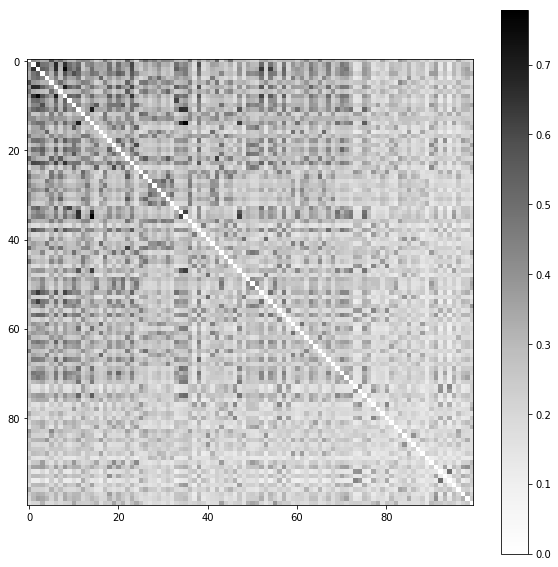

In [47]:
%matplotlib inline
fig  = plt.figure(figsize=(10,10))
plt.imshow(sim_mat, plt.cm.Greys, interpolation=None)
plt.colorbar()
plt.show()

In [48]:
print(mostSimCategories("Cabernet Sauvignon",sim_mat))

[('Merlot', 0.7543859649122807), ('Syrah', 0.6666666666666666), ('Pinot Noir', 0.6528925619834711), ('Meritage', 0.639344262295082), ('Cabernet Blend', 0.6260162601626016), ('Cabernet Franc', 0.5936254980079682), ('Malbec', 0.5503875968992248), ('Red Blend', 0.5384615384615384), ('Petite Sirah', 0.5384615384615384), ('Cabernet Sauvignon-Merlot', 0.5267175572519084), ('Grenache', 0.5151515151515151), ('Zinfandel', 0.5151515151515151), ('Bordeaux-style Red Blend', 0.5094339622641509), ('Shiraz', 0.5037593984962406)]


In [49]:
print(mostSimCategories("Pinot Noir",sim_mat))

[('Syrah', 0.6736401673640168), ('Cabernet Sauvignon', 0.6528925619834711), ('Merlot', 0.6528925619834711), ('Cabernet Franc', 0.606425702811245), ('Grenache', 0.5873015873015873), ('Meritage', 0.5151515151515151), ('Malbec', 0.5094339622641509), ('Rhône-style Red Blend', 0.5037593984962406)]


In [50]:
print(mostSimCategories("White Blend",sim_mat))

[('Pinot Grigio', 0.5151515151515151)]


In [52]:
print(mostSimCategories("Malbec",sim_mat))

[('Tempranillo', 0.7021276595744681), ('Carmenère', 0.6597510373443983), ('Tempranillo Blend', 0.6528925619834711), ('Garnacha', 0.5748031496062992), ('Cabernet Sauvignon', 0.5503875968992248), ('Merlot', 0.5444015444015444), ('Syrah', 0.5325670498084292), ('Mencía', 0.5220883534136547), ('Red Blend', 0.5151515151515151), ('Pinot Noir', 0.5094339622641509)]


In [53]:
wine_sums = np.sum(sim_mat, axis = 1)
order = np.argsort(wine_sums)[::-1]
sim_sums = [(wine_cats[i], wine_sums[i]) for i in order]
print("Most Similar: {}".format(sim_sums[0]))
print("Least Similar: {}".format(sim_sums[-1]))

Most Similar: ('Merlot', 34.60896690305062)
Least Similar: ('Melon', 16.676782733890928)


### Trying too see if we can determine red or white wine based on summaries.

In [54]:
from collections import Counter
def label(desc):
    red_in = "red" in desc
    white_in = "white" in desc
    if red_in and white_in:
        return "Both"
    if red_in:
        return "Red"
    if white_in:
        return "White"
    return "None"
 
labels = [label(desc) for cat, desc in top100wine_200descriptors.items()]
Counter(labels)

# Hm... Boths are mostly red wines.
print("#"*50)
print("Both")
print([wine_cats[i] for (i, label) in enumerate(labels) if label == "Both"])
print("#"*50)
print("Red")
print([wine_cats[i] for (i, label) in enumerate(labels) if label == "Red"])
print("#"*50)
print("White")
print([wine_cats[i] for (i, label) in enumerate(labels) if label == "White"])
print("#"*50)
print("None")
print([wine_cats[i] for (i, label) in enumerate(labels) if label == "None"])

##################################################
Both
['Sauvignon Blanc', 'Syrah', 'Zinfandel', 'Barbera', 'Cabernet Franc', 'Sangiovese Grosso', 'Gewürztraminer', 'Chenin Blanc', 'Glera', 'Prosecco', "Nero d'Avola", 'Moscato', 'Rhône-style White Blend', 'Garganega', 'Garnacha', 'Aglianico', 'Verdejo', 'Cabernet Blend', 'Petit Verdot', 'Pinotage', 'Touriga Nacional', 'Muscat', 'Fiano', 'Marsanne', 'Viura', 'St. Laurent', 'Shiraz-Cabernet Sauvignon', 'Falanghina', 'Tempranillo-Cabernet Sauvignon', 'Semillon-Sauvignon Blanc', 'Merlot-Cabernet Sauvignon']
##################################################
Red
['Pinot Noir', 'Merlot', 'Sangiovese', 'White Blend', 'Rosé', 'Portuguese Red', 'Sparkling Blend', 'Shiraz', 'Corvina, Rondinella, Molinara', 'Pinot Grigio', 'Port', 'Grüner Veltliner', 'Petite Sirah', 'Carmenère', 'Grenache', 'Gamay', 'Pinot Blanc', 'Torrontés', 'Montepulciano', 'Meritage', 'Primitivo', 'Cabernet Sauvignon-Merlot', 'Zweigelt', 'Roussanne', 'G-S-M', 'Monastrell', '

### Sample filtered data
Taking only...
- top 100 categories of wines by count
- wines from top 12 countries as represented by count


In [55]:
wines = top100wines[top100wines["country"].isin(country_counts[:12].keys())]

In [56]:
len(wines)

141759

In [ ]:
wines.describe().T

In [ ]:
# wines.to_csv("filtered_wines.csv")

### Assigning Clusters to Wines

In [71]:
def assignClusters():
    clusters = list(range(100))
    related_dict = {wine: mostSimCategories(wine, sim_mat100, threshold = 0.45)\
                   for wine in wine_cats}
    def mergeClusters(clusters, wineidx1, wineidx2):
        if wineidx2 < wineidx1:
            return
        engulfing = clusters[wineidx1]
        replacing = clusters[wineidx2]
        if engulfing == replacing:
            return
        clusters[wineidx2] = engulfing
        
    for i in range(1, 100):
        wine1 = wine_cats[i]
        related = related_dict[wine1]
        for rel, _ in related:
            rel_idx = cat_to_idx[rel]
            mergeClusters(clusters, i, rel_idx)
            
    return clusters
    

In [95]:
# Identifying Clusters
raw_clusters = assignClusters()
raw_cluster_counts = Counter(raw_clusters)

print("Number of Identified Clusters", len(raw_cluster_counts.values()))
refined_cluster_mapping = {list(raw_cluster_counts.keys())[idx]: idx for idx in range(21)}


Number of Identified Clusters 21


In [97]:
clusters = [refined_cluster_mapping[raw] for raw in raw_clusters]
#####################################################################

cluster_dict = {c: [] for c in range(21)}
for wineidx, c in enumerate(clusters):
    cluster_dict[c].append(wine_cats[wineidx])
for c in cluster_dict:
    print("#" * 50)
    print("Cluster Number {}".format(c))
    print("#" * 50)
    print(cluster_dict[c])
    print()

##################################################
Cluster Number 0
##################################################
['Chardonnay']

##################################################
Cluster Number 1
##################################################
['Pinot Noir', 'Cabernet Sauvignon', 'Red Blend', 'Syrah', 'Merlot', 'Zinfandel', 'Sangiovese', 'Malbec', 'Tempranillo', 'Nebbiolo', 'Shiraz', 'Corvina, Rondinella, Molinara', 'Rhône-style Red Blend', 'Barbera', 'Cabernet Franc', 'Sangiovese Grosso', 'Petite Sirah', 'Carmenère', 'Tempranillo Blend', 'Grenache', "Nero d'Avola", 'Garnacha', 'Dolcetto', 'Montepulciano', 'Aglianico', 'Meritage', 'Cabernet Blend', 'Primitivo', 'Cabernet Sauvignon-Merlot', 'Tinta de Toro', 'Pinotage', 'Mourvèdre', 'Bonarda', 'G-S-M', 'Cabernet Sauvignon-Syrah', 'Monastrell', 'Mencía', 'Shiraz-Cabernet Sauvignon', 'Shiraz-Viognier', 'Tempranillo-Cabernet Sauvignon', 'Merlot-Cabernet Sauvignon', 'Negroamaro']

##################################################


### Exporting Wine Similarity data

In [102]:
# Variety format {"name": variety, "most_similar": [{"name": , "score": }]}
def json_varieties(sim_mat, features_dict, threshold):
    varieties = []
    for idx, variety in enumerate(wine_cats):
        similar = mostSimCategories(variety, sim_mat, threshold = threshold)
        top10similar = mostSimCategories10(variety, sim_mat)
        varieties.append({"name": variety,\
                          "related": [{"name": sim_var, "score": score} for sim_var, score in similar],
                          "cluster": clusters[idx],
                          "most_similar10": [{"name": sim_var, "score": score} for sim_var, score in top10similar],
                          "features" : features_dict[variety]
                        })
    return varieties

In [103]:
## TO EXPORT

with open("wine_variety_similarities.json", "w") as f:
    
    features = all_cats_top_n_descriptors(top100wines, variety_counts.keys()[:100], n = 100)
    
    obj = {"varieties" : json_varieties(sim_mat100, features, 0.45),
           "variety_to_index": cat_to_idx,
           "sim_matrix": sim_mat.tolist()
          }
    json.dump(obj, f)